In [46]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [3]:
df = pd.read_csv('Breast_cancer_data.csv')

In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [6]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
df.isna()  # to check if we have some missing values in our data set
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [10]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


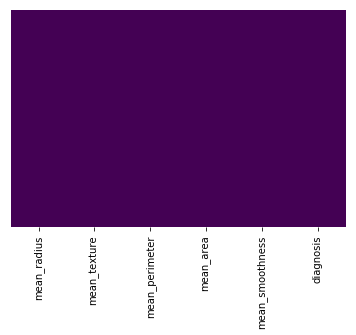

In [13]:
# missing data 
sns.heatmap(df.isnull(), yticklabels= False ,cbar=False,cmap='viridis')

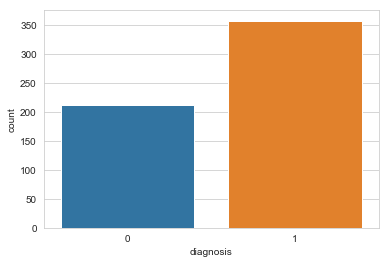

In [14]:
# see how the data is blanced
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

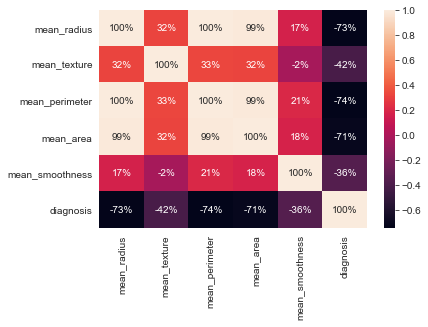

In [16]:

sns.heatmap(df.corr(),annot=True,fmt='.0%')

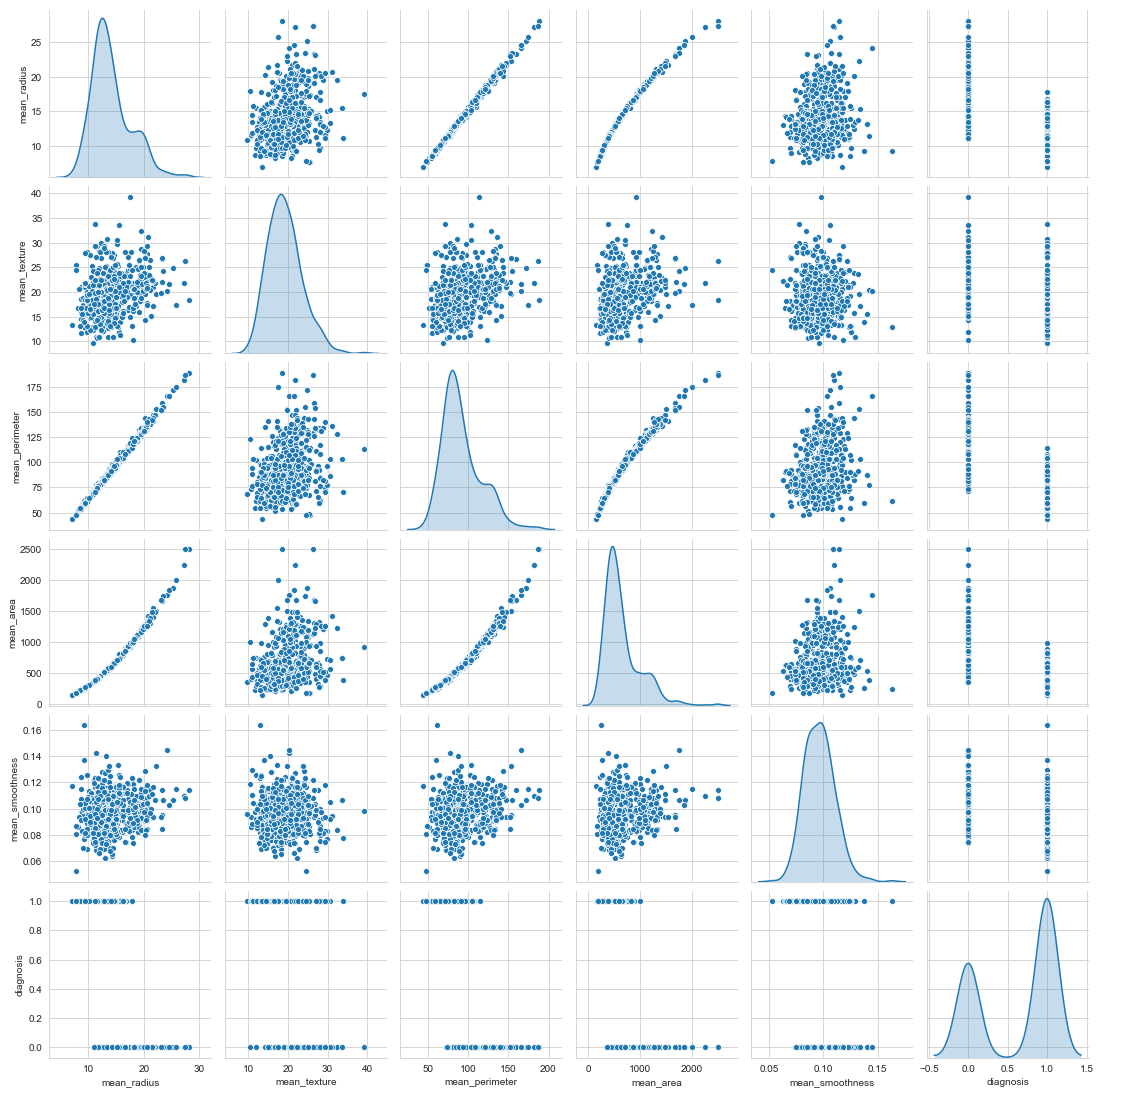

In [18]:
sns.pairplot(df,diag_kind='kde')

In [23]:
# split the data into indepndents features and target
X = df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
# split the data again 80% for training and 20% for testing

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [37]:
# 

In [44]:
estimator = XGBClassifier()

In [45]:

estimator.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [42]:
# make predictions for test data
y_pred = estimator.predict(X_test)
predictions = [round(value) for value in y_pred]

In [48]:
# evaluate predictions
y_pred = estimator.predict(X_test)
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

F1-score: 0.9333333333333333
Confusion matrix:


array([[34,  2],
       [ 8, 70]], dtype=int64)

In [49]:
cm = confusion_matrix(y_test,estimator.predict(X_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('Model test accuracy={}'.format((TN+TP)/(TN+TP+FN+FP)))

[[34  8]
 [ 2 70]]
Model test accuracy=0.9122807017543859


In [68]:
# for predicting 
import numpy as np
Xnew = [[0.79, 2.10,3.10,4.5,0.13]]
# make a prediction
ynew = np.array(Xnew).reshape((1,-1))
estimator.predict(ynew)

array([1], dtype=int64)

In [70]:
# create pckle file using serialziation
import pickle
pickle_out = open("estimator.pkl","wb")
pickle.dump(estimator,pickle_out)
pickle_out.close()